In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfmunk = pd.read_csv("../outputs/outputs_munk.tsv", sep = "\t")
dfmunk.loc[(dfmunk["Species A"] == "rat") & (dfmunk["Species B"] == "bakers"), :]

,Species A,Species B,Landmark no,GO type,Scoring metric,Prediction method,kA,kB,Average score,Standard deviation
0,rat,bakers,500,molecular_function,top-1-acc,dsd-knn,10,-1,0.025258,0.009828
1,rat,bakers,500,molecular_function,top-1-acc,mundo-munk-knn-weight-0.660,10,10,0.101916,0.011556
2,rat,bakers,500,molecular_function,top-1-acc,mundo-munk-knn-weight-0.660,10,20,0.141960,0.021459
3,rat,bakers,500,molecular_function,top-1-acc,mundo-munk-knn-weight-0.660,10,30,0.164748,0.025082
4,rat,bakers,500,molecular_function,top-1-acc,mundo-munk-knn-weight-0.660,10,40,0.173529,0.023675
...,...,...,...,...,...,...,...,...,...,...
415,rat,bakers,500,cellular_component,f1max,mundo-munk-knn-weight-0.660,50,20,0.330952,0.005146
416,rat,bakers,500,cellular_component,f1max,mundo-munk-knn-weight-0.660,50,30,0.341597,0.006342
417,rat,bakers,500,cellular_component,f1max,mundo-munk-knn-weight-0.660,50,40,0.344350,0.006911
418,rat,bakers,500,cellular_component,f1max,mundo-munk-knn-weight-0.660,50,50,0.346893,0.005804


In [3]:
dfmundo = pd.read_csv("../outputs/outputs_m4.tsv", sep = "\t")

dfmunk = dfmunk.loc[dfmunk["Prediction method"].apply(lambda x : x.startswith("mundo") and x.endswith("0.660"))]
dfmunk = dfmunk.iloc[:, [0, 1, 3, 4, 6, 7, 8]]
dfmunk

,Species A,Species B,GO type,Scoring metric,kA,kB,Average score
1,rat,bakers,molecular_function,top-1-acc,10,10,0.101916
2,rat,bakers,molecular_function,top-1-acc,10,20,0.141960
3,rat,bakers,molecular_function,top-1-acc,10,30,0.164748
4,rat,bakers,molecular_function,top-1-acc,10,40,0.173529
5,rat,bakers,molecular_function,top-1-acc,10,50,0.171790
...,...,...,...,...,...,...,...
2515,fly,human,cellular_component,f1max,50,20,0.509445
2516,fly,human,cellular_component,f1max,50,30,0.514230
2517,fly,human,cellular_component,f1max,50,40,0.514259
2518,fly,human,cellular_component,f1max,50,50,0.513559


In [4]:
wt = "0.660"
dfmun = dfmundo.loc[dfmundo["Prediction method"].apply(lambda x : x.startswith("mundo") and x.endswith(wt))]
dfmun = dfmun.iloc[:, [0, 1, 4, 5, 7, 8, 9]]
dfmun

,Species A,Species B,GO type,Scoring metric,kA,kB,Average score
0,rat,bakers,molecular_function,top-1-acc,10,10,0.076907
1,rat,bakers,molecular_function,top-1-acc,10,20,0.109982
2,rat,bakers,molecular_function,top-1-acc,10,30,0.152682
3,rat,bakers,molecular_function,top-1-acc,10,40,0.183674
4,rat,bakers,molecular_function,top-1-acc,10,50,0.151197
...,...,...,...,...,...,...,...
2155,mouse,human,cellular_component,f1max,50,20,0.577906
2156,mouse,human,cellular_component,f1max,50,30,0.578481
2157,mouse,human,cellular_component,f1max,50,40,0.578310
2158,mouse,human,cellular_component,f1max,50,50,0.577018


In [5]:
import numpy as np

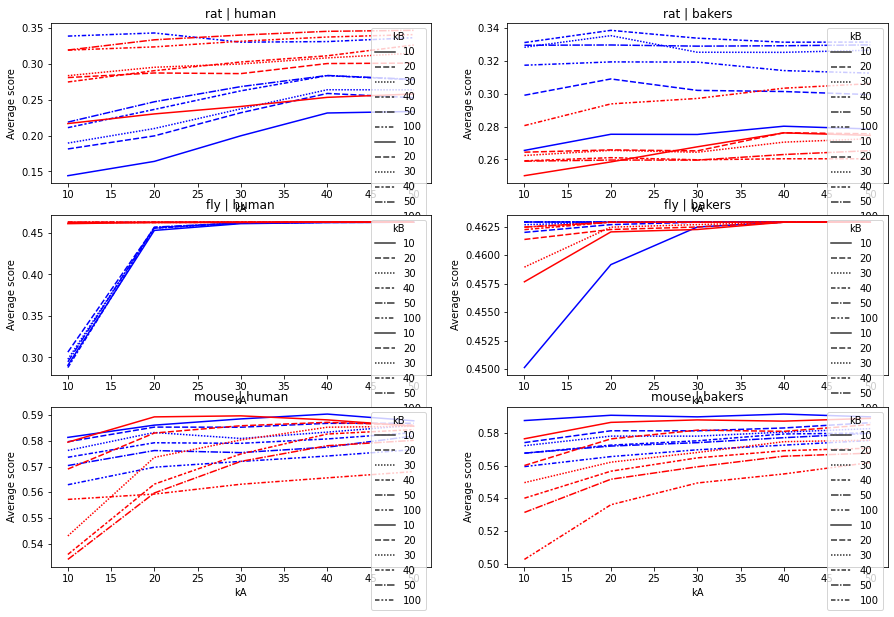

In [10]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10))
spA = ["rat", "fly", "mouse"]
spB = ["human", "bakers"]
go = "cellular_component"
metric = "top-1"
for i in range(2):
    for j in range(3):
        dfm3 = dfmun.loc[
            dfmun.iloc[:, [0, 1]].apply(lambda x : x[0] == spA[j] and x[1] == spB[i], axis = 1)
        ]
        dfm3 = dfm3.loc[
            dfm3["Scoring metric"].apply(lambda x : x.startswith(metric))
        ]
        
        dfmu = dfmunk.loc[
            dfmunk.iloc[:, [0, 1]].apply(lambda x : x[0] == spA[j] and x[1] == spB[i], axis = 1)
        ]
        dfmu = dfmu.loc[
            dfmu["Scoring metric"].apply(lambda x : x.startswith(metric))
        ]
        
        dfmu = dfmu.loc[
            dfmu["GO type"].apply(lambda x : x == go), :
        ]
        dfm3 = dfm3.loc[
            dfm3["GO type"].apply(lambda x : x == go), :
        ]
        dfmu = dfmu.iloc[:, [4, 5, 6]]
        dfm3 = dfm3.iloc[:, [4, 5, 6]]
        #dfmu = dfmu.loc[dfmu["kB"] == 20, :]
        #dfm3 = dfm3.loc[dfm3["kB"] == 50, :]
        # molecular function top 1 accuracy for a given species
        sns.lineplot(data = dfm3, x = "kA", y = "Average score", style = "kB", color = "blue", ax = axes[j, i])
        sns.lineplot(data = dfmu, x = "kA", y = "Average score", style = "kB", color = "red", ax = axes[j, i])
        
#        axes[j, i].plot(20 * np.ones(4), np.arange(1,5) * 0.05, color = "black")
        axes[j, i].set_title(f"{spA[j]} | {spB[i]}")
        

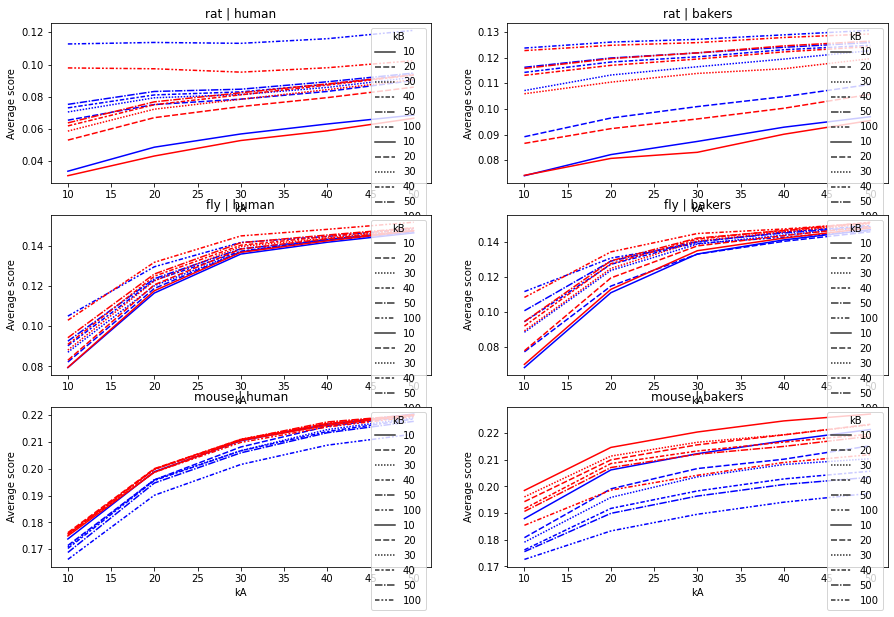

In [44]:

fig, axes = plt.subplots(3, 2, figsize = (15, 10))

wt1 = "1.000"
dfmun1 = dfmundo.loc[dfmundo["Prediction method"].apply(lambda x : x.startswith("mundo") and x.endswith(wt1))]
dfmun1 = dfmun1.iloc[:, [0, 1, 4, 5, 7, 8, 9]]

wt2 = "0.400"
dfmun2 = dfmundo.loc[dfmundo["Prediction method"].apply(lambda x : x.startswith("mundo") and x.endswith(wt2))]
dfmun2 = dfmun2.iloc[:, [0, 1, 4, 5, 7, 8, 9]]

go = "molecular_function"
spA = ["rat", "fly", "mouse"]
spB = ["human", "bakers"]
metric = "aupr"
for i in range(2):
    for j in range(3):
        dfm1 = dfmun1.loc[
            dfmun1.iloc[:, [0, 1]].apply(lambda x : x[0] == spA[j] and x[1] == spB[i], axis = 1)
        ]
        dfm1 = dfm1.loc[
            dfm1["Scoring metric"].apply(lambda x : x.startswith(metric))
        ]
        dfm2 = dfmun2.loc[
            dfmun2.iloc[:, [0, 1]].apply(lambda x : x[0] == spA[j] and x[1] == spB[i], axis = 1)
        ]
        dfm2 = dfm2.loc[
            dfm2["Scoring metric"].apply(lambda x : x.startswith(metric))
        ]
        
        dfm1 = dfm1.loc[
            dfm1["GO type"].apply(lambda x : x == go), :
        ]
        dfm2 = dfm2.loc[
            dfm2["GO type"].apply(lambda x : x == go), :
        ]
        dfm1 = dfm1.iloc[:, [4, 5, 6]]
        dfm2 = dfm2.iloc[:, [4, 5, 6]]
        # molecular function top 1 accuracy for a given species
        sns.lineplot(data = dfm1, x = "kA", y = "Average score", style = "kB", color = "blue", ax = axes[j, i])
        sns.lineplot(data = dfm2, x = "kA", y = "Average score", style = "kB", color = "red", ax = axes[j, i])
        
#        axes[j, i].plot(20 * np.ones(4), np.arange(1,5) * 0.05, color = "black")
        axes[j, i].set_title(f"{spA[j]} | {spB[i]}")
        